In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
import plotly.express as px

usamos el dataset de el kaggle
https://www.kaggle.com/datasets/guavocado/pokemon-stats-1025-pokemons/data

In [2]:
datos = pd.read_csv('pokemon_data.csv')

In [3]:
datos

,dexnum,name,generation,type1,type2,species,height,weight,ability1,ability2,...,catch_rate,base_friendship,base_exp,growth_rate,egg_group1,egg_group2,percent_male,percent_female,egg_cycles,special_group
0,1,Bulbasaur,1,Grass,Poison,Seed Pokémon,0.7,6.9,Overgrow,Chlorophyll,...,45,50,64,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
1,2,Ivysaur,1,Grass,Poison,Seed Pokémon,1.0,13.0,Overgrow,Chlorophyll,...,45,50,142,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
2,3,Venusaur,1,Grass,Poison,Seed Pokémon,2.0,100.0,Overgrow,Chlorophyll,...,45,50,236,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
3,4,Charmander,1,Fire,NaN,Lizard Pokémon,0.6,8.5,Blaze,Solar Power,...,45,50,62,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary
4,5,Charmeleon,1,Fire,NaN,Flame Pokémon,1.1,19.0,Blaze,Solar Power,...,45,50,142,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,Raging Bolt,9,Electric,Dragon,Paradox Pokémon,5.2,480.0,Protosynthesis,NaN,...,10,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Ancient Paradox
1021,1022,Iron Boulder,9,Rock,Psychic,Paradox Pokémon,1.5,162.5,Quark Drive,NaN,...,10,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Future Paradox
1022,1023,Iron Crown,9,Steel,Psychic,Paradox Pokémon,1.6,156.0,Quark Drive,NaN,...,10,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Future Paradox
1023,1024,Terapagos,9,Normal,NaN,Tera Pokémon,0.2,6.5,Tera Shift,NaN,...,255,—,—,Slow,Undiscovered,NaN,50.0,50.0,—,Legendary


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dexnum           1025 non-null   int64  
 1   name             1025 non-null   object 
 2   generation       1025 non-null   int64  
 3   type1            1025 non-null   object 
 4   type2            526 non-null    object 
 5   species          1025 non-null   object 
 6   height           1025 non-null   float64
 7   weight           1025 non-null   float64
 8   ability1         1025 non-null   object 
 9   ability2         858 non-null    object 
 10  hidden_ability   530 non-null    object 
 11  hp               1025 non-null   int64  
 12  attack           1025 non-null   int64  
 13  defense          1025 non-null   int64  
 14  sp_atk           1025 non-null   int64  
 15  sp_def           1025 non-null   int64  
 16  speed            1025 non-null   int64  
 17  total         

EDA

# ***1- Deseamos saber cuantos pokemons hay
 por cada tipo***

In [5]:
datosg=datos.groupby('type1')

Agrupamos por tipos de pokemon 1 ya que un pokemon puede tener 1 o dos tipos

In [6]:
datos1=datos[['type2']]

Tenemos que seperar los type2 ya que no todos los pokemons tienen dos tipos

In [7]:
datosg2=datos1.groupby('type2')

In [8]:
datos['count1']=(datosg['type1'].transform('count'))
datos['count2']=(datosg2['type2'].transform('count'))


In [9]:
datos

,dexnum,name,generation,type1,type2,species,height,weight,ability1,ability2,...,base_exp,growth_rate,egg_group1,egg_group2,percent_male,percent_female,egg_cycles,special_group,count1,count2
0,1,Bulbasaur,1,Grass,Poison,Seed Pokémon,0.7,6.9,Overgrow,Chlorophyll,...,64,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,103,41.0
1,2,Ivysaur,1,Grass,Poison,Seed Pokémon,1.0,13.0,Overgrow,Chlorophyll,...,142,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,103,41.0
2,3,Venusaur,1,Grass,Poison,Seed Pokémon,2.0,100.0,Overgrow,Chlorophyll,...,236,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,103,41.0
3,4,Charmander,1,Fire,NaN,Lizard Pokémon,0.6,8.5,Blaze,Solar Power,...,62,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary,66,NaN
4,5,Charmeleon,1,Fire,NaN,Flame Pokémon,1.1,19.0,Blaze,Solar Power,...,142,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary,66,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,Raging Bolt,9,Electric,Dragon,Paradox Pokémon,5.2,480.0,Protosynthesis,NaN,...,—,Slow,Undiscovered,NaN,NaN,NaN,—,Ancient Paradox,59,33.0
1021,1022,Iron Boulder,9,Rock,Psychic,Paradox Pokémon,1.5,162.5,Quark Drive,NaN,...,—,Slow,Undiscovered,NaN,NaN,NaN,—,Future Paradox,58,42.0
1022,1023,Iron Crown,9,Steel,Psychic,Paradox Pokémon,1.6,156.0,Quark Drive,NaN,...,—,Slow,Undiscovered,NaN,NaN,NaN,—,Future Paradox,36,42.0
1023,1024,Terapagos,9,Normal,NaN,Tera Pokémon,0.2,6.5,Tera Shift,NaN,...,—,Slow,Undiscovered,NaN,50.0,50.0,—,Legendary,118,NaN


Ahora con las cuentas de cada tipo en los pokemons 1 y 2 sumamos el conteo de esos dos grupos

In [10]:
datostypes=datos[['type1','count1','type2','count2']]

In [11]:
datostypes

,type1,count1,type2,count2
0,Grass,103,Poison,41.0
1,Grass,103,Poison,41.0
2,Grass,103,Poison,41.0
3,Fire,66,NaN,NaN
4,Fire,66,NaN,NaN
...,...,...,...,...
1020,Electric,59,Dragon,33.0
1021,Rock,58,Psychic,42.0
1022,Steel,36,Psychic,42.0
1023,Normal,118,NaN,NaN


In [12]:
datost=datostypes[['type1','count1']]
datost2=datostypes[['type2','count2']]
datost2=datost2.drop_duplicates()
datost=datost.drop_duplicates()
datost2=datost2.dropna(axis=0)

In [13]:
datost3 = datost.sort_values('type1')
datost3 = datost3.reset_index()
datost3=datost3.drop(['index'], axis=1)
datost3

,type1,count1
0,Bug,83
1,Dark,45
2,Dragon,37
3,Electric,59
4,Fairy,29
5,Fighting,40
6,Fire,66
7,Flying,9
8,Ghost,35
9,Grass,103


Separamos la columna types 1 y count y ordenamos por typos y resetamos los indices

In [14]:
datost4 = datost2.sort_values('type2')
datost4= datost4.reset_index()
datost4=datost4.drop(['index'], axis=1)
datost4

,type2,count2
0,Bug,9.0
1,Dark,24.0
2,Dragon,33.0
3,Electric,10.0
4,Fairy,35.0
5,Fighting,33.0
6,Fire,15.0
7,Flying,100.0
8,Ghost,30.0
9,Grass,24.0


Separamos la columna types 2 y count y ordenamos por typos y resetamos los indices

In [15]:
datostypes2=datos[['type1']]
datostypes2=datostypes2.drop_duplicates()
datostypes2=datostypes2.sort_values('type1')
datostypes2=datostypes2.reset_index()
datostypes2=datostypes2.drop(['index'], axis=1)


ahora que tenemos el mismo indice para los tipos asi como el orden los mismo tipos podemos sumar ambos resultado de contadores y asi tener el total de pokemones de cada tipo

In [16]:
datostypes2['total']=((datost3['count1']) + (datost4['count2']))
datostypes2

,type1,total
0,Bug,92.0
1,Dark,69.0
2,Dragon,70.0
3,Electric,69.0
4,Fairy,64.0
5,Fighting,73.0
6,Fire,81.0
7,Flying,109.0
8,Ghost,65.0
9,Grass,127.0


ahora que tenemos el tipo de pokemon con su tutotal podemos graficar para visualizar mejor los datos

separamos las columnas de type y count 1 ahora limpiamos los datos

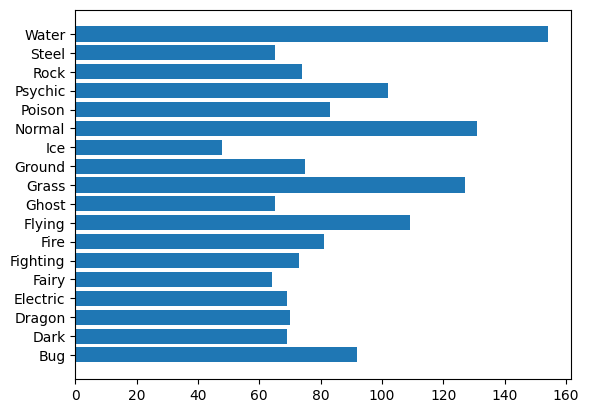

In [17]:
tipo=datostypes2['type1']
total=datostypes2['total']

plt.barh(tipo,total)
plt.show()

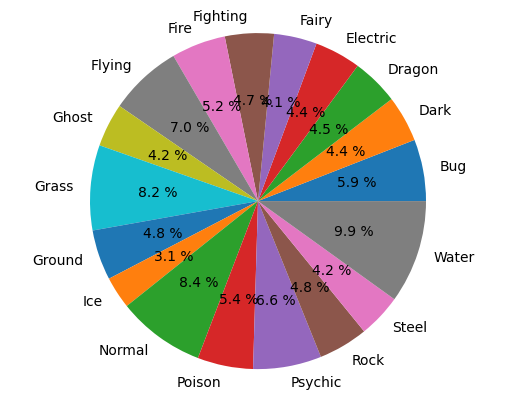

In [18]:
nombres =datostypes2['type1']
total= datostypes2['total']
plt.pie(total, labels=nombres,autopct="%0.1f %%")
plt.axis("equal")
plt.show()

# ***2- Cantidad de pokemons en cada generacion***

In [19]:
datos2 = pd.read_csv('pokemon_data.csv')
datos2g = datos.groupby('generation')

Agrupamos por generacion

In [20]:
datos2['count']=(datos2g['generation'].transform('count'))

contamos los pokemos que ahi por cada generacion

In [21]:
datos2

,dexnum,name,generation,type1,type2,species,height,weight,ability1,ability2,...,base_friendship,base_exp,growth_rate,egg_group1,egg_group2,percent_male,percent_female,egg_cycles,special_group,count
0,1,Bulbasaur,1,Grass,Poison,Seed Pokémon,0.7,6.9,Overgrow,Chlorophyll,...,50,64,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,151
1,2,Ivysaur,1,Grass,Poison,Seed Pokémon,1.0,13.0,Overgrow,Chlorophyll,...,50,142,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,151
2,3,Venusaur,1,Grass,Poison,Seed Pokémon,2.0,100.0,Overgrow,Chlorophyll,...,50,236,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,151
3,4,Charmander,1,Fire,NaN,Lizard Pokémon,0.6,8.5,Blaze,Solar Power,...,50,62,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary,151
4,5,Charmeleon,1,Fire,NaN,Flame Pokémon,1.1,19.0,Blaze,Solar Power,...,50,142,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,Raging Bolt,9,Electric,Dragon,Paradox Pokémon,5.2,480.0,Protosynthesis,NaN,...,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Ancient Paradox,120
1021,1022,Iron Boulder,9,Rock,Psychic,Paradox Pokémon,1.5,162.5,Quark Drive,NaN,...,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Future Paradox,120
1022,1023,Iron Crown,9,Steel,Psychic,Paradox Pokémon,1.6,156.0,Quark Drive,NaN,...,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Future Paradox,120
1023,1024,Terapagos,9,Normal,NaN,Tera Pokémon,0.2,6.5,Tera Shift,NaN,...,—,—,Slow,Undiscovered,NaN,50.0,50.0,—,Legendary,120


In [22]:
datos2r=datos2[['generation','count']]

separamos las columnas generacion

In [23]:
datos2r=datos2r.drop_duplicates()
datos2r

,generation,count
0,1,151
151,2,100
251,3,135
386,4,107
493,5,156
649,6,72
721,7,88
809,8,96
905,9,120


eliminamos los duplicados y para tener mejor visualizacion

In [24]:
fig = px.bar(datos2r, x = 'generation', y = 'count',
             color = 'generation')

fig.show()

visualizacion de barras de las generaciones

# ***3- el total de pokemons por su rareza y legendarios por region***

In [25]:
datos3= pd.read_csv('pokemon_data.csv')

In [26]:
datos3g=datos3.groupby('special_group')

agrupamos por el tipo de rareza

In [27]:
datos3['cant_ra']=(datos3g['special_group'].transform('count'))
datos3

,dexnum,name,generation,type1,type2,species,height,weight,ability1,ability2,...,base_friendship,base_exp,growth_rate,egg_group1,egg_group2,percent_male,percent_female,egg_cycles,special_group,cant_ra
0,1,Bulbasaur,1,Grass,Poison,Seed Pokémon,0.7,6.9,Overgrow,Chlorophyll,...,50,64,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,857
1,2,Ivysaur,1,Grass,Poison,Seed Pokémon,1.0,13.0,Overgrow,Chlorophyll,...,50,142,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,857
2,3,Venusaur,1,Grass,Poison,Seed Pokémon,2.0,100.0,Overgrow,Chlorophyll,...,50,236,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,857
3,4,Charmander,1,Fire,NaN,Lizard Pokémon,0.6,8.5,Blaze,Solar Power,...,50,62,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary,857
4,5,Charmeleon,1,Fire,NaN,Flame Pokémon,1.1,19.0,Blaze,Solar Power,...,50,142,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary,857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,Raging Bolt,9,Electric,Dragon,Paradox Pokémon,5.2,480.0,Protosynthesis,NaN,...,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Ancient Paradox,10
1021,1022,Iron Boulder,9,Rock,Psychic,Paradox Pokémon,1.5,162.5,Quark Drive,NaN,...,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Future Paradox,10
1022,1023,Iron Crown,9,Steel,Psychic,Paradox Pokémon,1.6,156.0,Quark Drive,NaN,...,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Future Paradox,10
1023,1024,Terapagos,9,Normal,NaN,Tera Pokémon,0.2,6.5,Tera Shift,NaN,...,—,—,Slow,Undiscovered,NaN,50.0,50.0,—,Legendary,70


contamos las rareza de los pokemons

In [28]:
datos_ra3=datos3[['special_group','cant_ra']]

separamos los datos de as rarezas

In [29]:
datos_ra3=datos_ra3.drop_duplicates()
datos_ra3

,special_group,cant_ra
0,Ordinary,857
137,Fossil,25
143,Legendary,70
150,Mythical,23
171,Baby Pokemon,19
792,Ultra Beast,11
983,Ancient Paradox,10
989,Future Paradox,10


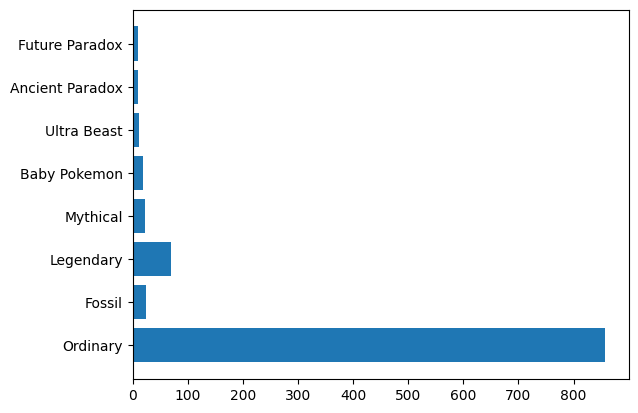

In [30]:
rareza =datos_ra3['special_group']
total= datos_ra3['cant_ra']
plt.barh(rareza,total)
plt.show()

buscamos los legendarios de todas las regiones y vemos cuantos pokemons legendarios ahi por regiones

In [31]:
datos3= pd.read_csv('pokemon_data.csv')
datos4=datos3[(datos3['special_group']=='Legendary')]
datos4

,dexnum,name,generation,type1,type2,species,height,weight,ability1,ability2,...,catch_rate,base_friendship,base_exp,growth_rate,egg_group1,egg_group2,percent_male,percent_female,egg_cycles,special_group
143,144,Articuno,1,Ice,Flying,Freeze Pokémon,1.7,55.4,Pressure,Snow Cloak,...,3,35,290,Slow,Undiscovered,NaN,NaN,NaN,80,Legendary
144,145,Zapdos,1,Electric,Flying,Electric Pokémon,1.6,52.6,Pressure,Static,...,3,35,290,Slow,Undiscovered,NaN,NaN,NaN,80,Legendary
145,146,Moltres,1,Fire,Flying,Flame Pokémon,2.0,60.0,Pressure,Flame Body,...,3,35,290,Slow,Undiscovered,NaN,NaN,NaN,80,Legendary
149,150,Mewtwo,1,Psychic,NaN,Genetic Pokémon,2.0,122.0,Pressure,Unnerve,...,3,0,340,Slow,Undiscovered,NaN,NaN,NaN,120,Legendary
242,243,Raikou,2,Electric,NaN,Thunder Pokémon,1.9,178.0,Pressure,Inner Focus,...,3,35,261,Slow,Undiscovered,NaN,NaN,NaN,80,Legendary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,1014,Okidogi,9,Poison,Fighting,Retainer Pokémon,1.8,92.0,Toxic Chain,Guard Dog,...,3,—,—,Slow,Undiscovered,NaN,100.0,0.0,—,Legendary
1014,1015,Munkidori,9,Poison,Psychic,Retainer Pokémon,1.0,12.2,Toxic Chain,Frisk,...,3,—,—,Slow,Undiscovered,NaN,100.0,0.0,—,Legendary
1015,1016,Fezandipiti,9,Poison,Fairy,Retainer Pokémon,1.4,30.1,Toxic Chain,Technician,...,3,—,—,Slow,Undiscovered,NaN,100.0,0.0,—,Legendary
1016,1017,Ogerpon,9,Grass,NaN,Mask Pokémon,1.2,39.8,Defiant,Embody Aspect,...,5,—,—,Slow,Undiscovered,NaN,0.0,100.0,—,Legendary


Filtramos por que todos sean legendarios

In [32]:
datos4g=datos4.groupby('generation')

In [33]:
datos4['count']=(datos4g['generation'].transform('count'))

<ipython-input-33-b02b02617e4e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
datos4

,dexnum,name,generation,type1,type2,species,height,weight,ability1,ability2,...,base_friendship,base_exp,growth_rate,egg_group1,egg_group2,percent_male,percent_female,egg_cycles,special_group,count
143,144,Articuno,1,Ice,Flying,Freeze Pokémon,1.7,55.4,Pressure,Snow Cloak,...,35,290,Slow,Undiscovered,NaN,NaN,NaN,80,Legendary,4
144,145,Zapdos,1,Electric,Flying,Electric Pokémon,1.6,52.6,Pressure,Static,...,35,290,Slow,Undiscovered,NaN,NaN,NaN,80,Legendary,4
145,146,Moltres,1,Fire,Flying,Flame Pokémon,2.0,60.0,Pressure,Flame Body,...,35,290,Slow,Undiscovered,NaN,NaN,NaN,80,Legendary,4
149,150,Mewtwo,1,Psychic,NaN,Genetic Pokémon,2.0,122.0,Pressure,Unnerve,...,0,340,Slow,Undiscovered,NaN,NaN,NaN,120,Legendary,4
242,243,Raikou,2,Electric,NaN,Thunder Pokémon,1.9,178.0,Pressure,Inner Focus,...,35,261,Slow,Undiscovered,NaN,NaN,NaN,80,Legendary,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,1014,Okidogi,9,Poison,Fighting,Retainer Pokémon,1.8,92.0,Toxic Chain,Guard Dog,...,—,—,Slow,Undiscovered,NaN,100.0,0.0,—,Legendary,11
1014,1015,Munkidori,9,Poison,Psychic,Retainer Pokémon,1.0,12.2,Toxic Chain,Frisk,...,—,—,Slow,Undiscovered,NaN,100.0,0.0,—,Legendary,11
1015,1016,Fezandipiti,9,Poison,Fairy,Retainer Pokémon,1.4,30.1,Toxic Chain,Technician,...,—,—,Slow,Undiscovered,NaN,100.0,0.0,—,Legendary,11
1016,1017,Ogerpon,9,Grass,NaN,Mask Pokémon,1.2,39.8,Defiant,Embody Aspect,...,—,—,Slow,Undiscovered,NaN,0.0,100.0,—,Legendary,11


tenemos ahora tenemos la cantidad de legendarios en cada region

In [35]:
datos4s=datos4[['generation','count']]

datos4s=datos4s.drop_duplicates()

In [36]:
datos4s

,generation,count
143,1,4
242,2,4
376,3,8
479,4,9
637,5,9
715,6,3
771,7,11
887,8,11
1000,9,11


In [37]:
fig = px.bar(datos4s, x = 'generation', y = 'count',
             color = 'generation')

fig.show()

Visualizamos los datos

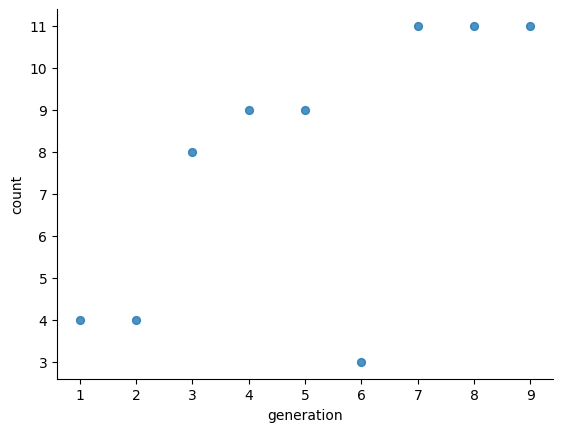

In [38]:
from matplotlib import pyplot as plt
datos4s.plot(kind='scatter', x='generation', y='count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# ***4- Distribucion de peso y altura de los pokemons***

In [39]:
datos5= pd.read_csv('pokemon_data.csv')

In [40]:
datos5

,dexnum,name,generation,type1,type2,species,height,weight,ability1,ability2,...,catch_rate,base_friendship,base_exp,growth_rate,egg_group1,egg_group2,percent_male,percent_female,egg_cycles,special_group
0,1,Bulbasaur,1,Grass,Poison,Seed Pokémon,0.7,6.9,Overgrow,Chlorophyll,...,45,50,64,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
1,2,Ivysaur,1,Grass,Poison,Seed Pokémon,1.0,13.0,Overgrow,Chlorophyll,...,45,50,142,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
2,3,Venusaur,1,Grass,Poison,Seed Pokémon,2.0,100.0,Overgrow,Chlorophyll,...,45,50,236,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
3,4,Charmander,1,Fire,NaN,Lizard Pokémon,0.6,8.5,Blaze,Solar Power,...,45,50,62,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary
4,5,Charmeleon,1,Fire,NaN,Flame Pokémon,1.1,19.0,Blaze,Solar Power,...,45,50,142,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,Raging Bolt,9,Electric,Dragon,Paradox Pokémon,5.2,480.0,Protosynthesis,NaN,...,10,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Ancient Paradox
1021,1022,Iron Boulder,9,Rock,Psychic,Paradox Pokémon,1.5,162.5,Quark Drive,NaN,...,10,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Future Paradox
1022,1023,Iron Crown,9,Steel,Psychic,Paradox Pokémon,1.6,156.0,Quark Drive,NaN,...,10,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Future Paradox
1023,1024,Terapagos,9,Normal,NaN,Tera Pokémon,0.2,6.5,Tera Shift,NaN,...,255,—,—,Slow,Undiscovered,NaN,50.0,50.0,—,Legendary


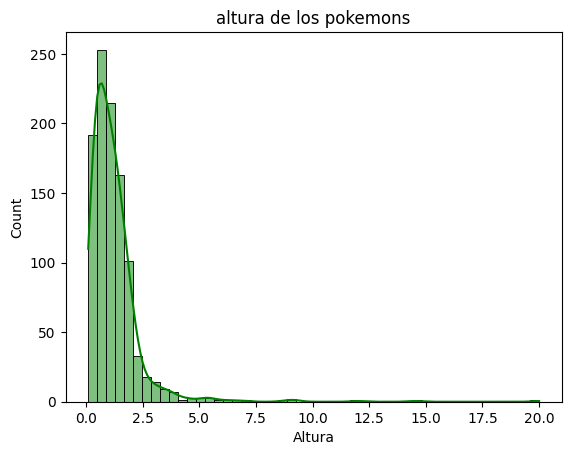

In [41]:
sns.histplot(datos5['height'], bins=50, kde=True, color='Green')
plt.title('altura de los pokemons')
plt.xlabel('Altura')
plt.ylabel('Count')
plt.show()

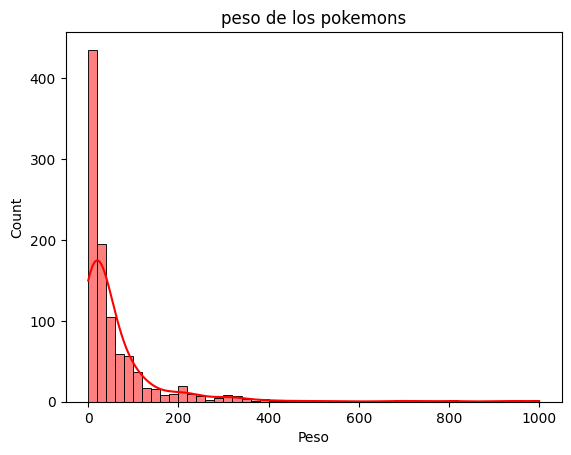

In [42]:
sns.histplot(datos5['weight'], bins=50, kde=True, color='Red')
plt.title('peso de los pokemons')
plt.xlabel('Peso')
plt.ylabel('Count')
plt.show()

visualizamos como esta distribuida la altura y el peso de los pokemons

## ***5- Pokemons cuyo chance de captura sea mayor al 50% y menor o igual al 50% en base a las especies***

In [43]:
datos6= pd.read_csv('pokemon_data.csv')
datos6

,dexnum,name,generation,type1,type2,species,height,weight,ability1,ability2,...,catch_rate,base_friendship,base_exp,growth_rate,egg_group1,egg_group2,percent_male,percent_female,egg_cycles,special_group
0,1,Bulbasaur,1,Grass,Poison,Seed Pokémon,0.7,6.9,Overgrow,Chlorophyll,...,45,50,64,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
1,2,Ivysaur,1,Grass,Poison,Seed Pokémon,1.0,13.0,Overgrow,Chlorophyll,...,45,50,142,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
2,3,Venusaur,1,Grass,Poison,Seed Pokémon,2.0,100.0,Overgrow,Chlorophyll,...,45,50,236,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
3,4,Charmander,1,Fire,NaN,Lizard Pokémon,0.6,8.5,Blaze,Solar Power,...,45,50,62,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary
4,5,Charmeleon,1,Fire,NaN,Flame Pokémon,1.1,19.0,Blaze,Solar Power,...,45,50,142,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,Raging Bolt,9,Electric,Dragon,Paradox Pokémon,5.2,480.0,Protosynthesis,NaN,...,10,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Ancient Paradox
1021,1022,Iron Boulder,9,Rock,Psychic,Paradox Pokémon,1.5,162.5,Quark Drive,NaN,...,10,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Future Paradox
1022,1023,Iron Crown,9,Steel,Psychic,Paradox Pokémon,1.6,156.0,Quark Drive,NaN,...,10,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Future Paradox
1023,1024,Terapagos,9,Normal,NaN,Tera Pokémon,0.2,6.5,Tera Shift,NaN,...,255,—,—,Slow,Undiscovered,NaN,50.0,50.0,—,Legendary


In [44]:
datos6s=datos6[['species','catch_rate']]
datos6s=datos6s.drop_duplicates()

Separamos las columnas de species y tasa de captura entre mas grande sea tasa de captura mejor chance es de atrapar el pokemon

In [45]:
datos6s

,species,catch_rate
0,Seed Pokémon,45
3,Lizard Pokémon,45
4,Flame Pokémon,45
6,Tiny Turtle Pokémon,45
7,Turtle Pokémon,45
...,...,...
1016,Mask Pokémon,5
1017,Alloy Pokémon,10
1018,—,10
1023,Tera Pokémon,255


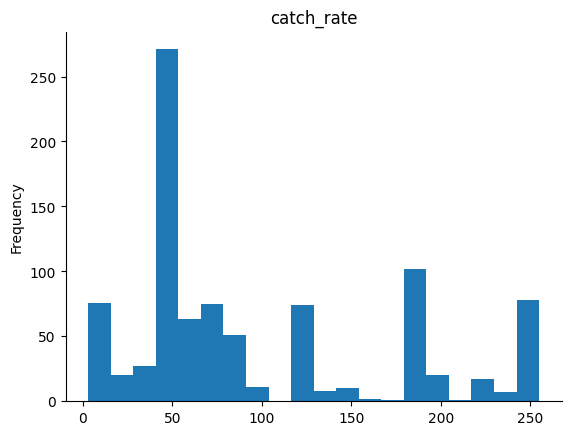

In [46]:
from matplotlib import pyplot as plt
datos6s['catch_rate'].plot(kind='hist', bins=20, title='catch_rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

vizualizamos la frecuencia de los datos

In [47]:
datos6s.describe()

,catch_rate
count,914.000000
mean,98.148796
std,75.994507
min,3.000000
25%,45.000000
50%,67.500000
75%,150.000000
max,255.000000


In [48]:
datos6g=datos6s.groupby('species')

In [49]:
datos6s['count']=(datos6g['species'].transform('count'))

In [50]:
datos6s

,species,catch_rate,count
0,Seed Pokémon,45,2
3,Lizard Pokémon,45,1
4,Flame Pokémon,45,2
6,Tiny Turtle Pokémon,45,1
7,Turtle Pokémon,45,1
...,...,...,...
1016,Mask Pokémon,5,1
1017,Alloy Pokémon,10,2
1018,—,10,1
1023,Tera Pokémon,255,1


In [51]:
datos6g2=datos6s.groupby('species')

In [52]:
datos6s['prom']=(datos6g['catch_rate'].transform('mean'))

calculamos el promedio de la tasa de captura que tiene cada especie de los pokemons

In [53]:
datos6s.describe()

,catch_rate,count,prom
count,914.000000,914.000000,914.000000
mean,98.148796,1.573304,98.148796
std,75.994507,0.903679,66.737882
min,3.000000,1.000000,3.000000
25%,45.000000,1.000000,45.000000
50%,67.500000,1.000000,82.500000
75%,150.000000,2.000000,140.000000
max,255.000000,6.000000,255.000000


In [54]:
datos6s2=datos6s[datos6s['prom']>82.500]
datos6ss=datos6s[datos6s['prom']<82.51]

Filtramos los datos mayor al 50% y menor e igual al 50%

In [55]:
datos6sss=datos6s2[['species','prom']]
datos6ss2=datos6ss[['species','prom']]
datos6sss=datos6sss.drop_duplicates()
datos6ss2=datos6ss2.drop_duplicates()

In [56]:
datos6sss

,species,prom
0,Seed Pokémon,140.0
9,Worm Pokémon,222.5
10,Cocoon Pokémon,120.0
12,Hairy Bug Pokémon,255.0
15,Tiny Bird Pokémon,222.5
...,...,...
975,Jettison Pokémon,100.0
977,Mimicry Pokémon,100.0
979,Spiny Fish Pokémon,90.0
1011,Matcha Pokémon,90.0


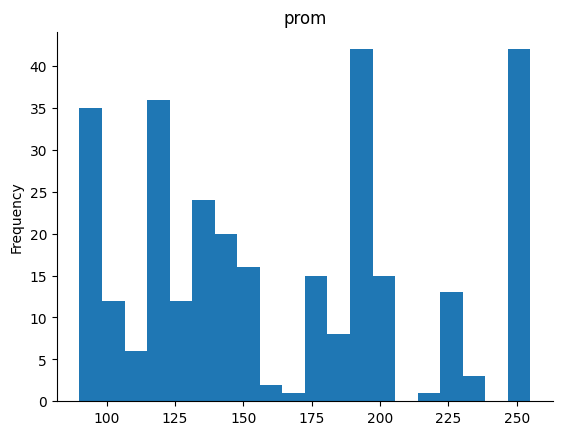

In [57]:
from matplotlib import pyplot as plt
datos6sss['prom'].plot(kind='hist', bins=20, title='prom')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [58]:
datos6ss2

,species,prom
3,Lizard Pokémon,45.0
4,Flame Pokémon,24.0
6,Tiny Turtle Pokémon,45.0
7,Turtle Pokémon,45.0
8,Shellfish Pokémon,45.0
...,...,...
1010,Candy Apple Pokémon,45.0
1013,Retainer Pokémon,3.0
1016,Mask Pokémon,5.0
1018,—,10.0


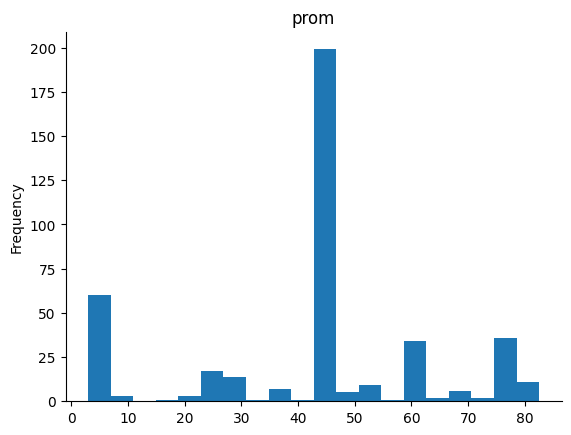

In [59]:
from matplotlib import pyplot as plt
datos6ss2['prom'].plot(kind='hist', bins=20, title='prom')
plt.gca().spines[['top', 'right',]].set_visible(False)

visualizamos las frecuencias de el mayor y el menorigual de los prom

In [60]:
datos6ex=datos6ss2[['prom']]

In [61]:
datos6ex1=datos6sss[['prom']]

In [62]:
datos6ex=datos6ex.drop_duplicates()
datos6ex1=datos6ex1.drop_duplicates()

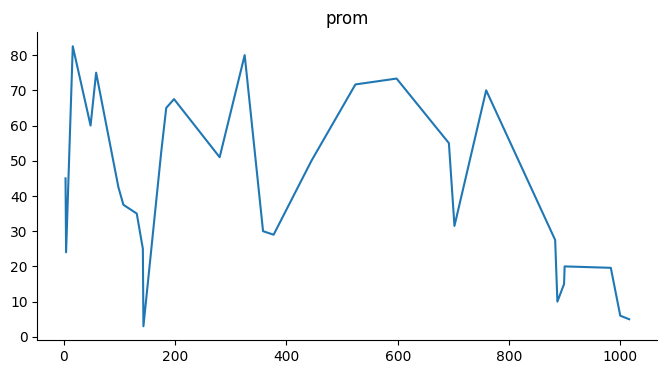

In [63]:
datos6ex['prom'].plot(kind='line', figsize=(8, 4), title='prom')
plt.gca().spines[['top', 'right']].set_visible(False)

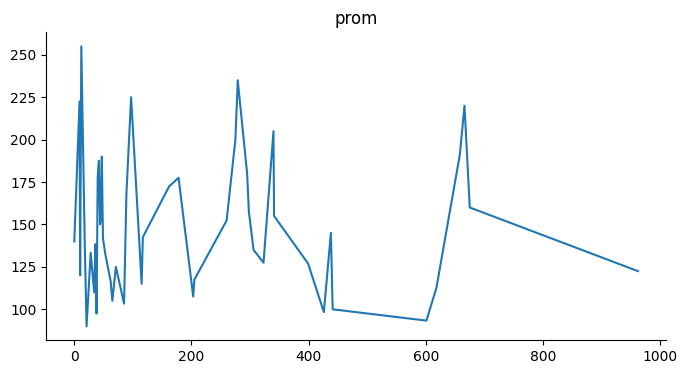

In [64]:
datos6ex1['prom'].plot(kind='line', figsize=(8, 4), title='prom')
plt.gca().spines[['top', 'right']].set_visible(False)